# Cross-Country Comparison

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Load Cleaned Datasets

In [3]:
# Load cleaned CSVs
benin = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sl = pd.read_csv("../data/sierraleone_clean.csv")

# Add country column to each
benin['Country'] = 'Benin'
togo['Country'] = 'Togo'
sl['Country'] = 'Sierraleone'

# Concatenate into a single DataFrame
df_all = pd.concat([benin, togo, sl], ignore_index=True)

## Metric Comparison

### Boxplots

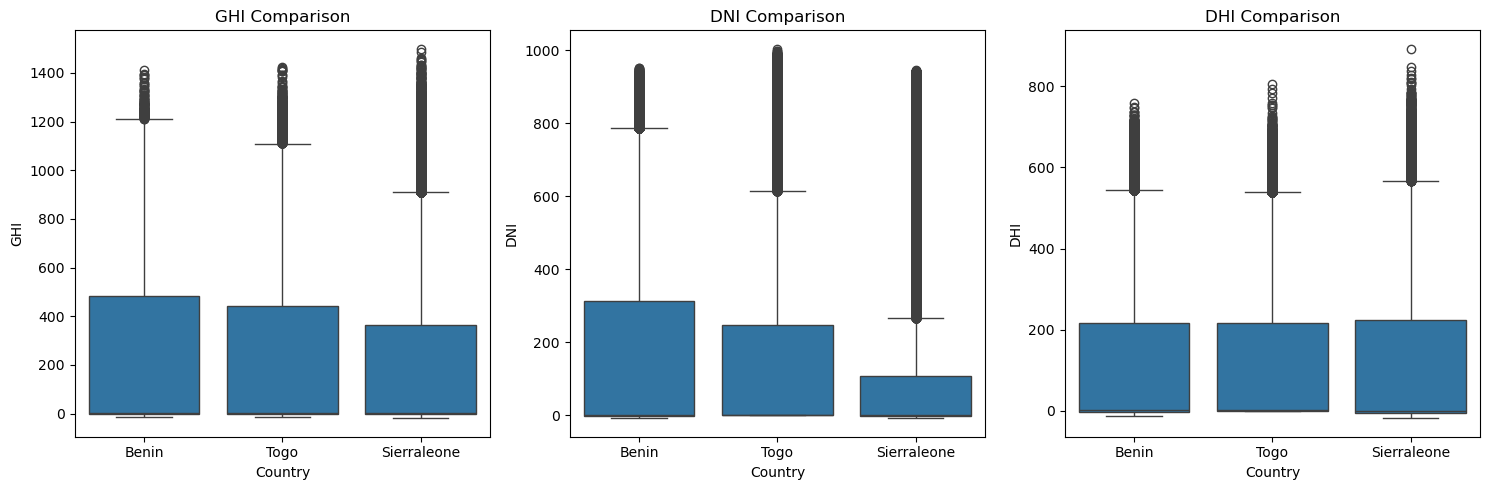

In [4]:
plt.figure(figsize=(15, 5))

for i, metric in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_all, x='Country', y=metric)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()

### Summary Table

In [5]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierraleone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo         230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                     
                std  
Country              
Benin        158.69  
Sierraleone  158.95  
Togo         156.52

## Statistical Testing

In [7]:
#Statistical Test: One-Way ANOVA or Kruskal–Wallis

# One-way ANOVA
anova_result = stats.f_oneway(benin['GHI'], togo['GHI'], sl['GHI'])
print("ANOVA p-value:", anova_result.pvalue)

# Kruskal–Wallis test (non-parametric)
kruskal_result = stats.kruskal(benin['GHI'], togo['GHI'], sl['GHI'])
print("Kruskal-Wallis p-value:", kruskal_result.pvalue)

ANOVA p-value: 0.0
Kruskal-Wallis p-value: 0.0


Both tests strongly reject the null hypothesis that all countries have the same mean/median GHI.
The differences in solar radiation (GHI) across Benin, Togo, and Sierra Leone are statistically significant.

## Bar Chart – Rank Countries by Avg GHI

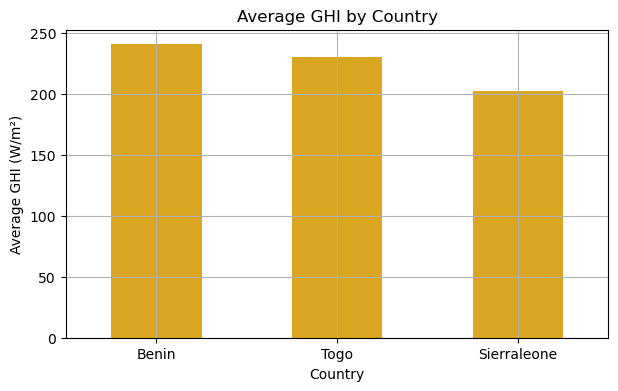

In [10]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

avg_ghi.plot(kind='bar', color='goldenrod', figsize=(7,4))
plt.title("Average GHI by Country")
plt.ylabel("Average GHI (W/m²)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

### Key Observations

- **Benin** shows the highest **average and median GHI**, making it the most promising candidate for solar investment.
- **Togo** demonstrates **higher variability** in GHI, suggesting less predictable solar potential.
- **Sierraleone** has **consistently lower GHI**, but more stable readings, which may still be viable depending on cost and infrastructure.
